# 형태소 분석

In [1]:
import pandas as pd
df_dgbdata = pd.read_csv("news_data_preprocessing.csv")
df_dgbdata.head()

,Unnamed: 0,date,year,month,day,title,nouns_title,press,contents
0,0,2021-05-01,2021,5,1,"DGB대구은행, 은행권 중금리대출 실적 1위",DGB 대구 은행 은행권 금리 대출 실적,글로벌이코노믹,DGB대구은행의 중금리대출 실적이 지방은행뿐만 아니라 은행권 전체에서 가장 많은 것...
1,1,2021-05-01,2021,5,1,"DGB대구은행, 어버이날 맞이 효(孝) 마스크 지원",DGB 대구 은행 어버이날 맞이 마스크 지원,경북신문,DGB대구은행(은행장 임성훈)은 다가오는 어버이날을 맞아 지역 내 방역취약계층 어르...
2,2,2021-05-01,2021,5,1,은행·비은행 동반성장…지방금융지주 1분기 '好好好',은행 은행 동반성 지방 금융 지주 1분 好好好,미디어펜,DGB금융의 순이익은 지난해 1분기에 견줘 40% 급증했다. 핵심 계열사인 대구은행...
3,3,2021-05-01,2021,5,1,"DGB대구銀, 코로나 대응 관련 ‘유공 행정안전부 장관표창’",DGB 대구 코로나 대응 관련 유공 행정안전부 장관 표창,더퍼블릭,DGB대구은행(이하 대구은행)은 코로나19 재난 방역 적극 참여 및 지역사회 지원활...
4,4,2021-05-01,2021,5,1,"대구은행, 방역취약계층 어르신 대상 KF94 마스크 전달",대구 은행 방역 취약 계층 어르신 대상 KF 94 마스크 전달,일요신문,"- DGB대구은행, 어버이날 맞아 효(孝) 마스크 지원 DGB대구은행(은행장 임성훈..."


In [10]:
df_dgbdata.iloc[0,5]

'DGB대구은행, 은행권 중금리대출 실적 1위'

In [2]:
from konlpy.tag import Mecab, Komoran
tokenizer = Komoran()
token = Komoran(userdic="./user_dict.txt")

In [11]:
tokenizer.pos(df_dgbdata.iloc[0,5])

[('DGB', 'SL'),
 ('대구은행', 'NNP'),
 (',', 'SP'),
 ('은행', 'NNG'),
 ('권', 'XSN'),
 ('중', 'NNB'),
 ('금리', 'NNP'),
 ('대출', 'NNG'),
 ('실적', 'NNG'),
 ('1', 'SN'),
 ('위', 'NNB')]

In [12]:
token.pos(df_dgbdata.iloc[0,5])

[('DGB', 'SL'),
 ('대구은행', 'NNP'),
 (',', 'SP'),
 ('은행', 'NNG'),
 ('권', 'XSN'),
 ('중', 'NNB'),
 ('금리', 'NNP'),
 ('대출', 'NNG'),
 ('실적', 'NNG'),
 ('1', 'SN'),
 ('위', 'NNB')]

# 워드클라우드 시각화

In [13]:
word_dict ={}
for cont in df_dgbdata.title:
    for word, morpheme in token.pos(cont):
        if morpheme in ['NNG', 'NNP', 'NNB', "NNM"] and len(word) > 1 : #NNG NNP NNB NNM
            if word_dict.get(word) == None:
                word_dict[word] = 1
            else:
                word_dict[word] += 1

In [18]:
words = sorted(word_dict.items(), key=lambda x : x[1], reverse=True)
words

[('대구은행', 4697),
 ('금융', 2902),
 ('그룹', 987),
 ('대출', 786),
 ('대구', 784),
 ('지원', 708),
 ('은행', 660),
 ('지역', 505),
 ('메타버스', 455),
 ('실시', 428),
 ('경영', 411),
 ('개최', 407),
 ('사랑', 380),
 ('전달', 376),
 ('협약', 348),
 ('투자', 342),
 ('비대', 338),
 ('기업', 327),
 ('고객', 316),
 ('센터', 316),
 ('업무', 304),
 ('서비스', 298),
 ('최대', 297),
 ('채용', 294),
 ('회장', 281),
 ('디지털', 281),
 ('이벤트', 274),
 ('카드', 274),
 ('출시', 271),
 ('모집', 270),
 ('하이', 269),
 ('증권', 267),
 ('경북', 256),
 ('전문', 255),
 ('지방은행', 246),
 ('분기', 243),
 ('공인', 232),
 ('캄보디아', 227),
 ('신용', 219),
 ('금리', 216),
 ('지주', 216),
 ('역대', 216),
 ('소상', 216),
 ('실적', 208),
 ('점포', 206),
 ('자금', 205),
 ('피해', 203),
 ('주년', 203),
 ('오픈', 203),
 ('순이익', 197),
 ('임성훈', 197),
 ('지방', 194),
 ('실천', 192),
 ('상품', 191),
 ('인사', 174),
 ('코로나', 171),
 ('상반기', 171),
 ('관리', 170),
 ('복합', 168),
 ('캠페인', 166),
 ('재단', 161),
 ('행사', 159),
 ('확대', 158),
 ('전세', 156),
 ('창립', 154),
 ('체결', 152),
 ('독도', 151),
 ('기념', 150),
 ('페이', 149),
 ('주택', 145),
 (

In [33]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/gulim.ttc', 
                      width = 800, 
                      height = 800,
                      colormap = 'Accent_r', #폰트 색깔
                      background_color='white')

wordcloud = wordcloud.generate_from_frequencies(dict(words))

In [34]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

<class 'numpy.ndarray'>
(800, 800, 3)


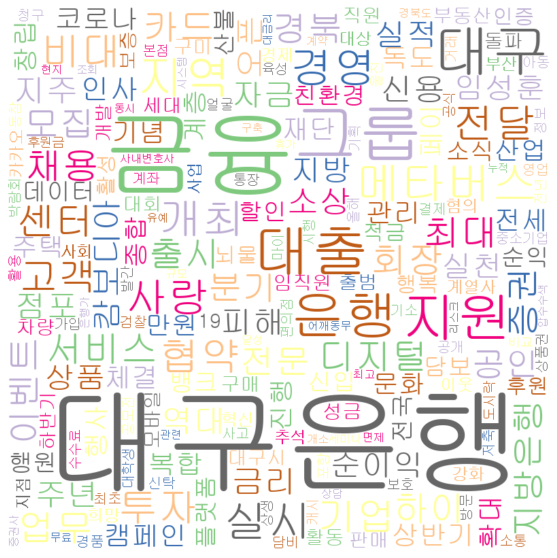

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off') #테두리 제거
plt.show()